In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing   import LabelEncoder
import statsmodels.api as sm
from statsmodels.formula.api import ols
from matplotlib import font_manager, rc
from kmodes import kmodes
from kmodes.kprototypes import KPrototypes
from fancyimpute import KNN    
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [44]:
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
#rc={'font.family': font_name, 'font.size': 32, 'axes.labelsize': 32, 'legend.fontsize': 32.0, 'axes.titlesize': 32, 'xtick.labelsize': 32, 'ytick.labelsize': 32}
#rc = {'font.family':font_name,'font.size':50,'axes.titlesize':50,'axes.labelsize':50 }
#rc('font', family='MHunmin')
fig_size=plt.rcParams["figure.figsize"]
#fig size in inches
fig_size[0]=10
fig_size[1]=8
sns.set_context("talk") #, rc={"font.size":30,"axes.titlesize":30,"axes.labelsize":20})   
#sns.set(rc={'figure.figsize':(11.7,8.27),"font.size":20,"axes.titlesize":20,"axes.labelsize":20},style="white")
df = pd.read_csv("C:/Users/suer/Dropbox/Restart/Restart5.csv", engine='python')
df['센터인지'] = df['센터인지'].map({1:'예',2:'아니오'})
df['프로그램인지'] = df['프로그램인지'].map({1:'예',2:'아니오'})
df['필요성'] = df['필요성'].map({1:5, 2:4, 3:3, 4:2, 5:1})
df['참여의사'] = df['참여의사'].map({1:5, 2:4, 3:3, 4:2, 5:1})

In [45]:
df['성별'] = df['성별'].map({1:'남성', 2:'여성'})
df['구분'] = df['구분'].map({1:'군복학', 2:'일반복학',3:'편입'})
df['휴학이유'] = df['휴학이유'].map({1:'군입대',2:'경제적문제',3:'학교불만족',4:'전공불일치',5:'취업준비',6:'심리적적응',7:'질병',8:'기타'})
df['어려운점1'] = df['어려운점1'].map({1:'학업',2:'대인관계',3:'진로설정',4:'학교생활',5:'경제적문제',6:'기타'})
df['어려운점2'] = df['어려운점2'].map({1:'학업',2:'대인관계',3:'진로설정',4:'학교생활',5:'경제적문제',6:'기타'})
df['어려운점3'] = df['어려운점3'].map({1:'학업',2:'대인관계',3:'진로설정',4:'학교생활',5:'경제적문제',6:'기타'})
df['도움1'] = df['도움1'].map({1:'심리적성상담',2:'학교생활지도',3:'진로지도',4:'학습지도',5:'대인관계',6:'기타'})
df['도움2'] = df['도움2'].map({1:'심리적성상담',2:'학교생활지도',3:'진로지도',4:'학습지도',5:'대인관계',6:'기타'})
df['도움3'] = df['도움3'].map({1:'심리적성상담',2:'학교생활지도',3:'진로지도',4:'학습지도',5:'대인관계',6:'기타'})
df['진로계획'] = df['진로계획'].map({1:'취업',2:'고시준비',3:'대학원진학',4:'유학',5:'자영창업',6:'교직',7:'무계획',8:'무계획',9:'기타'})
df['도움대상1'] = df['도움대상1'].map({1:'동기',2:'선후배',3:'학과교수',4:'진로교육센터',5:'취업지원팀',6:'학생상담센터',7:'교육혁신원',8:'기타'})
df['도움대상2'] = df['도움대상2'].map({1:'동기',2:'선후배',3:'학과교수',4:'진로교육센터',5:'취업지원팀',6:'학생상담센터',7:'교육혁신원',8:'기타'})
df['도움대상3'] = df['도움대상3'].map({1:'동기',2:'선후배',3:'학과교수',4:'진로교육센터',5:'취업지원팀',6:'학생상담센터',7:'교육혁신원',8:'기타'})
df['불필요이유'] = df['불필요이유'].map({1:'무관심',2:'정보부족',3:'도움안됨',4:'부담됨',5:'기타'})
df['불참이유'] = df['불참이유'].map({1:'정보부족',2:'시간부족',3:'불필요',4:'낮가림등 적응문제',5:'도움안됨',6:'진로준비부족',7:'참여시과제부담',8:'기타'})
df['희망1'] = df['희망1'].map({1:'진로상담',2:'진로집단상담',3:'학습전략특강',4:'대인관계강화프로그램',5:'스트레스완화프로그램',6:'학교적응 멘토링',7:'진로캠프',8:'진로진단검사 활용프로그램',9:'기타'})
df['희망2'] = df['희망2'].map({1:'진로상담',2:'진로집단상담',3:'학습전략특강',4:'대인관계강화프로그램',5:'스트레스완화프로그램',6:'학교적응 멘토링',7:'진로캠프',8:'진로진단검사 활용프로그램',9:'기타'})
df['희망3'] = df['희망3'].map({1:'진로상담',2:'진로집단상담',3:'학습전략특강',4:'대인관계강화프로그램',5:'스트레스완화프로그램',6:'학교적응 멘토링',7:'진로캠프',8:'진로진단검사 활용프로그램',9:'기타'})


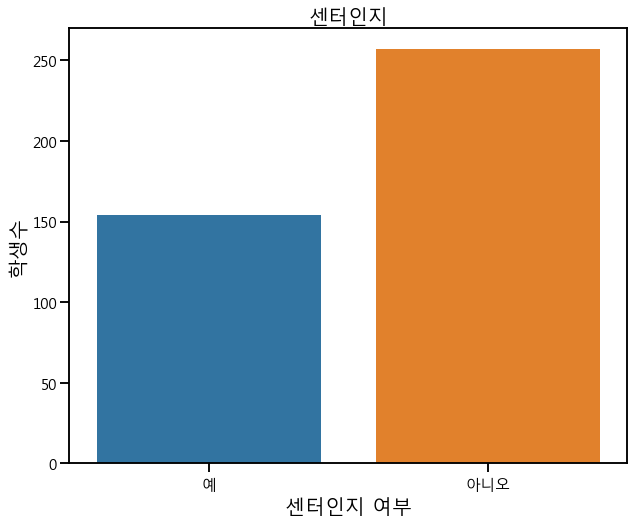

In [46]:
b = sns.countplot(x='센터인지',data=df)
b.axes.set_title("센터인지",fontsize=20)
b.set_xlabel("센터인지 여부",fontsize=20)
b.set_ylabel("학생수",fontsize=20)
b.tick_params(labelsize=15)

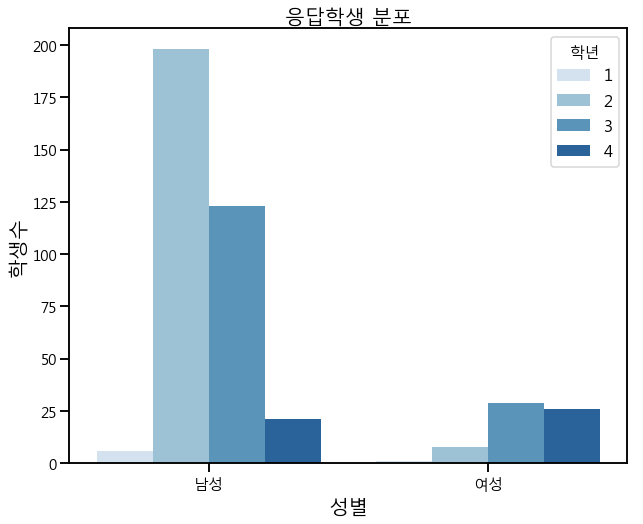

In [47]:
b = sns.countplot(x='성별',hue='학년',data=df,palette='Blues')
b.axes.set_title("응답학생 분포",fontsize=20)
b.set_xlabel("성별",fontsize=20)
b.set_ylabel("학생수",fontsize=20)
b.tick_params(labelsize=15)

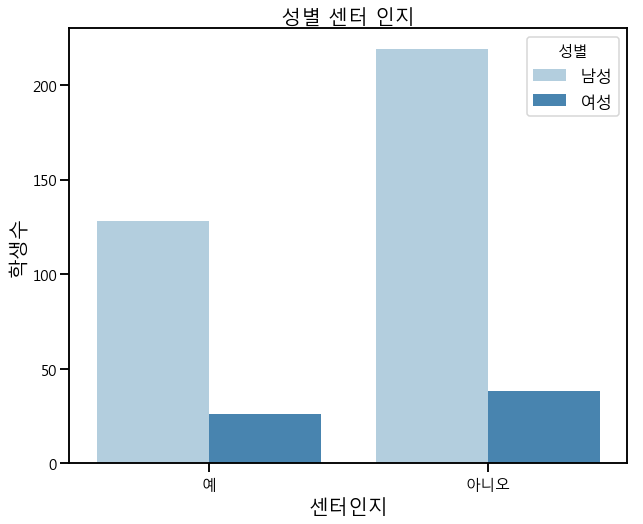

In [48]:
b = sns.countplot(x='센터인지',data=df, hue='성별',palette='Blues')
b.axes.set_title("성별 센터 인지",fontsize=20)
b.set_xlabel("센터인지",fontsize=20)
b.set_ylabel("학생수",fontsize=20)
b.tick_params(labelsize=15)

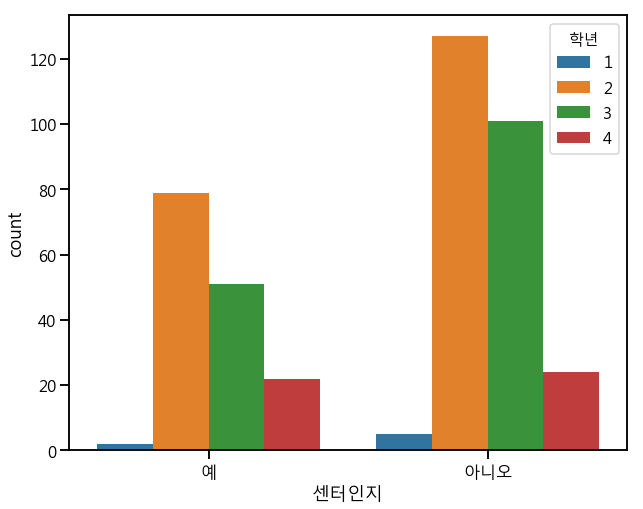

In [49]:
sns.countplot(x='센터인지',data=df, hue='학년')

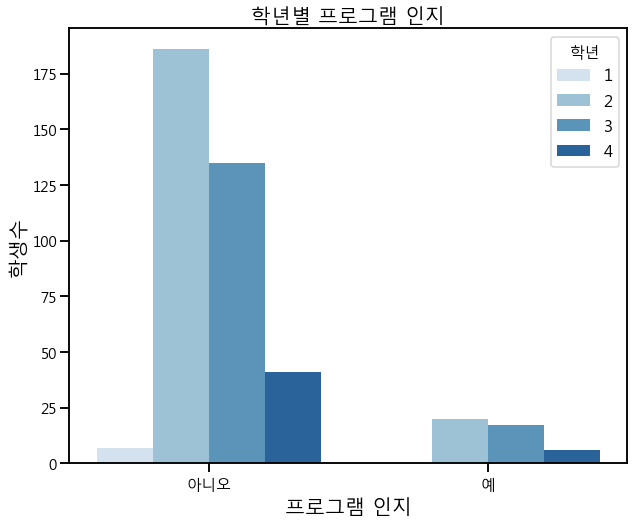

In [50]:
b = sns.countplot(x='프로그램인지',data=df, hue='학년', palette='Blues')
#b = sns.countplot(x='센터인지',data=df, hue='성별',palette='Blues')
b.axes.set_title("학년별 프로그램 인지",fontsize=20)
b.set_xlabel("프로그램 인지",fontsize=20)
b.set_ylabel("학생수",fontsize=20)
b.tick_params(labelsize=15)

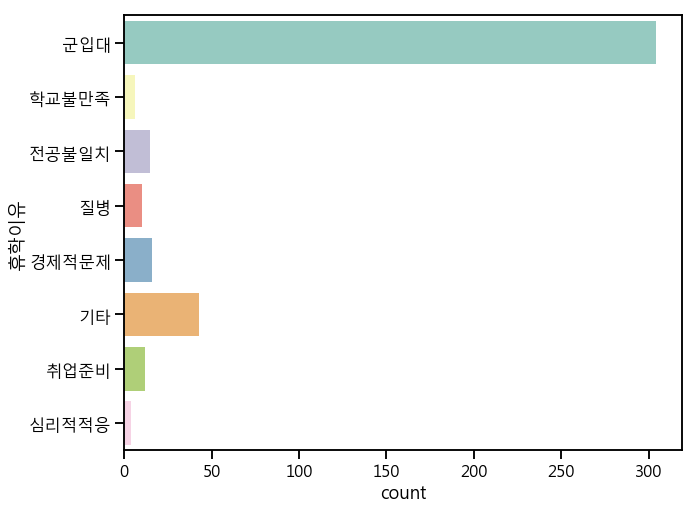

In [51]:
sns.countplot(y='휴학이유',data=df, palette='Set3')

In [52]:
dff = df[df['휴학이유'] != '군입대']

In [53]:
df.columns

Index(['센터인지', '프로그램인지', '휴학이유', '어려운점1', '어려운점2', '어려운점3', '도움1', '도움2',
       '도움3', '진로계획', '필요성', '불필요이유', '참여의사', '불참이유', '도움대상1', '도움대상2',
       '도움대상3', '선호시간', '희망1', '희망2', '희망3', '상담회수', '구분', '학과', '연령', '학년',
       '성별'],
      dtype='object')

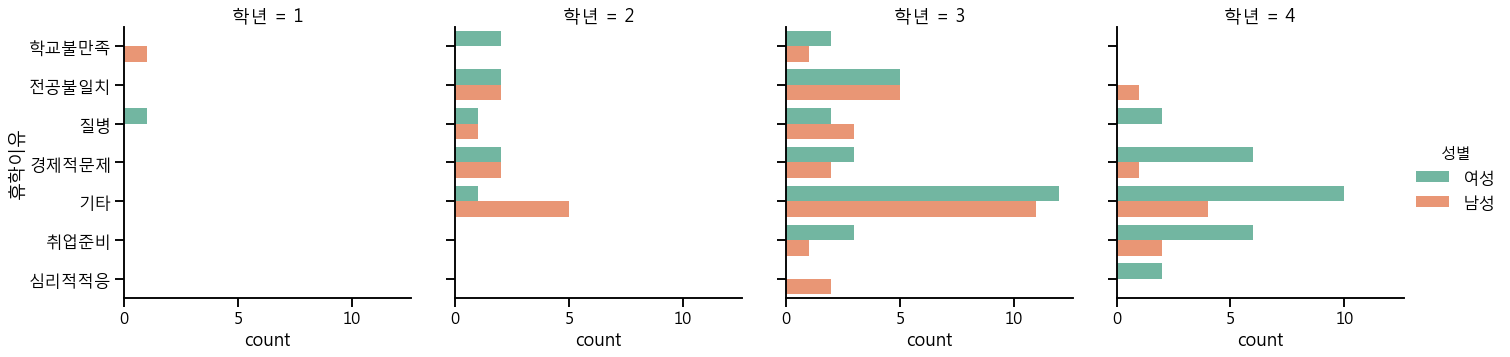

In [54]:
sns.catplot(y='휴학이유',col='학년', hue='성별', data=dff, kind='count', palette='Set2')

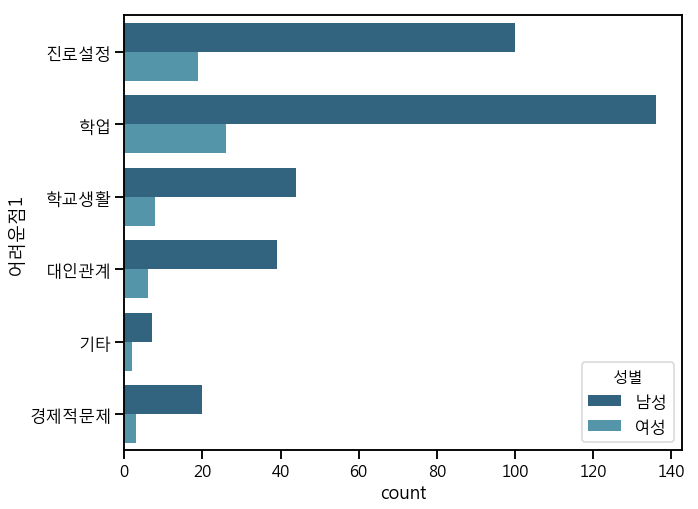

In [55]:
sns.countplot(y='어려운점1', hue='성별',data=df,palette="YlGnBu_d")

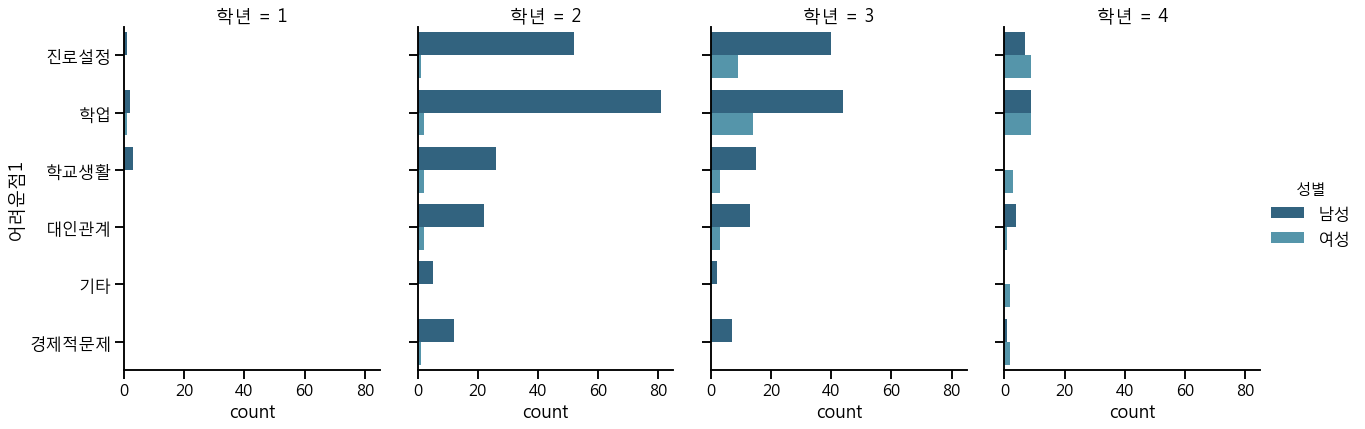

In [56]:
sns.catplot(y='어려운점1', col='학년',hue='성별', kind='count',data=df, capsize=.2, palette="YlGnBu_d", height=6, aspect=.75,)

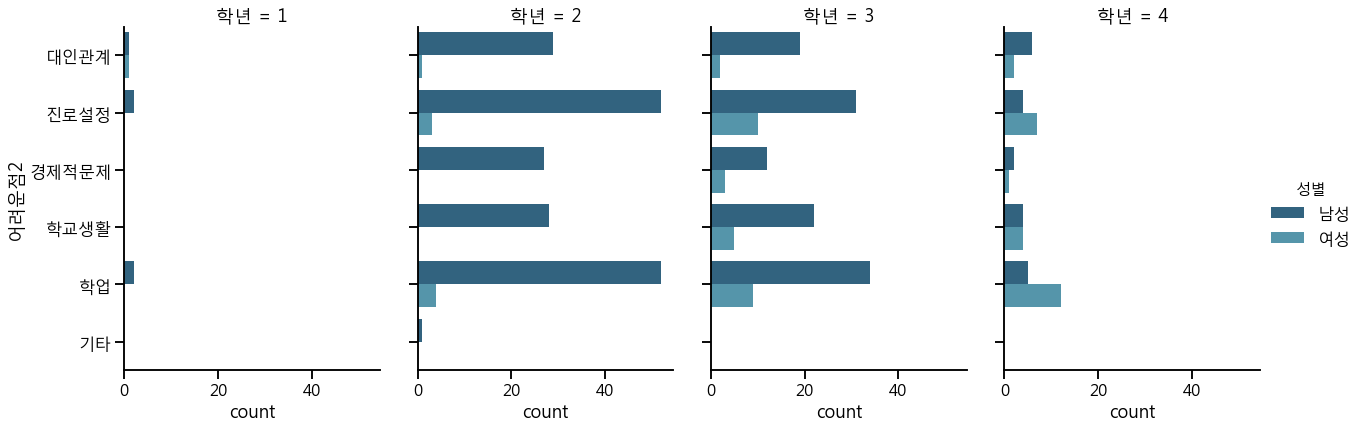

In [57]:
sns.catplot(y='어려운점2', col='학년',hue='성별', kind='count',data=df, capsize=.2, palette="YlGnBu_d", height=6, aspect=.75,)

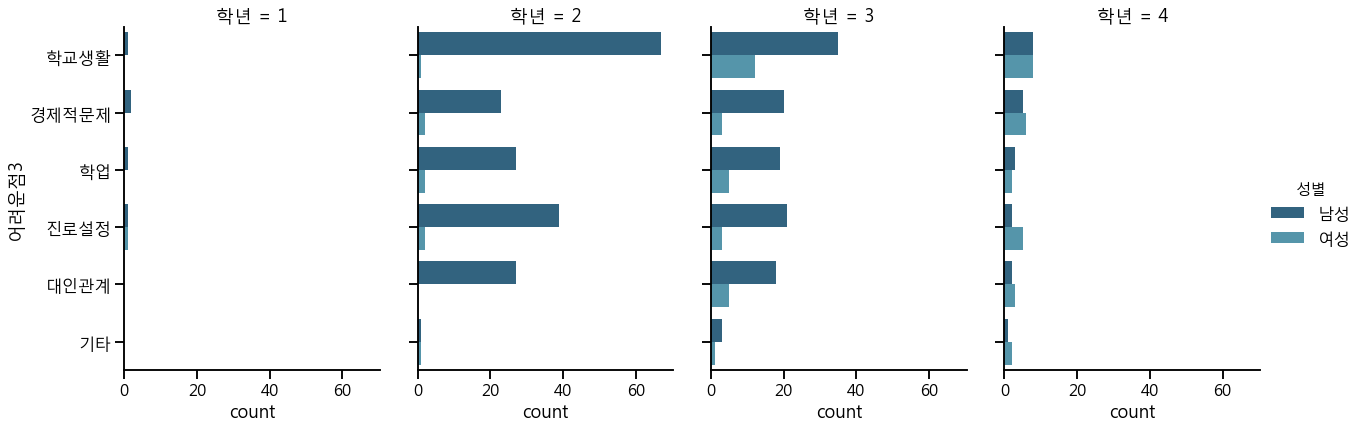

In [58]:
sns.catplot(y='어려운점3', col='학년',hue='성별', kind='count',data=df, capsize=.2, palette="YlGnBu_d", height=6, aspect=.75,)

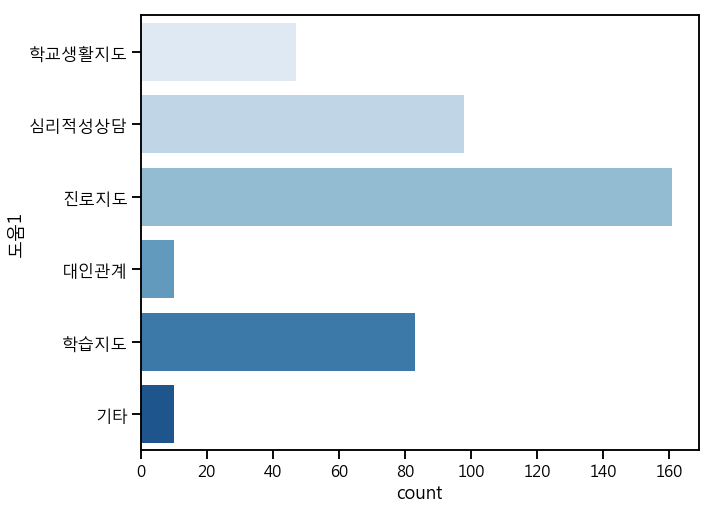

In [59]:
sns.countplot(y='도움1', data=df, palette="Blues")

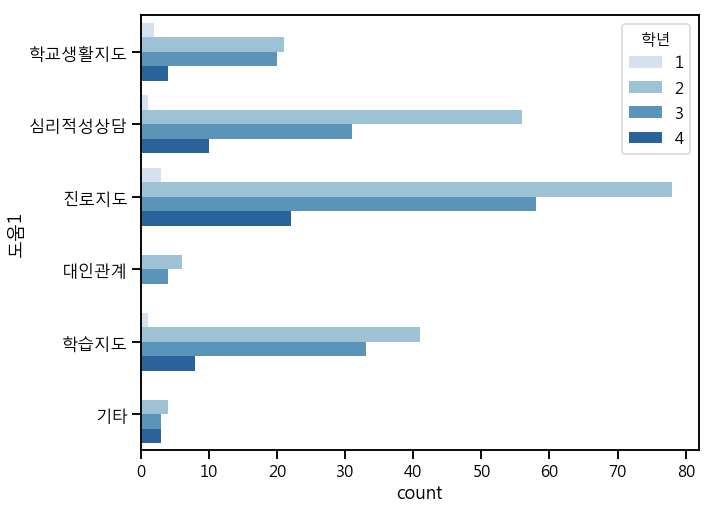

In [60]:
sns.countplot(y='도움1', hue='학년',data=df, palette="Blues")

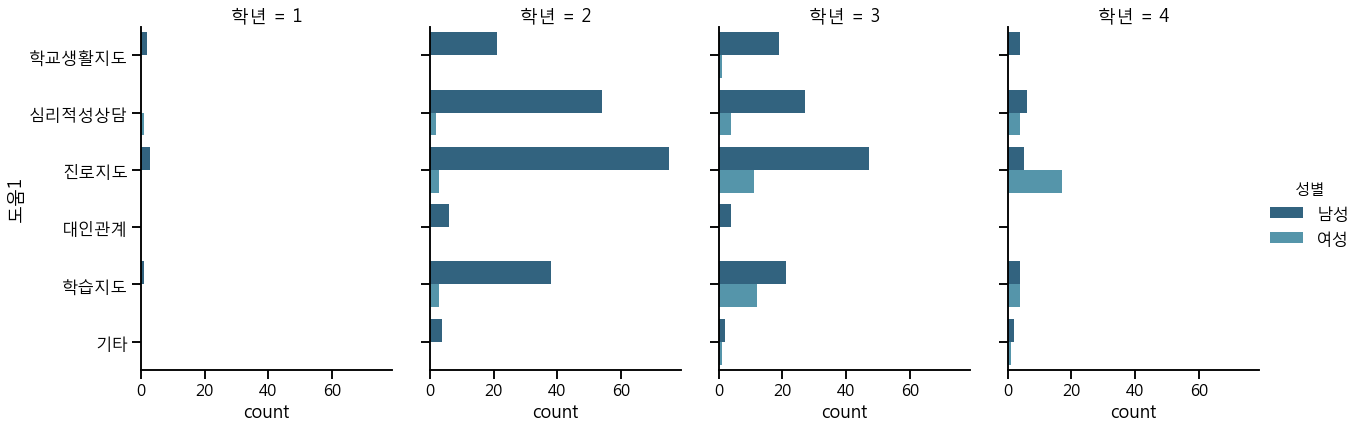

In [61]:
sns.catplot(y='도움1', col='학년',hue='성별', kind='count',data=df, capsize=.2, palette="YlGnBu_d", height=6, aspect=.75,)

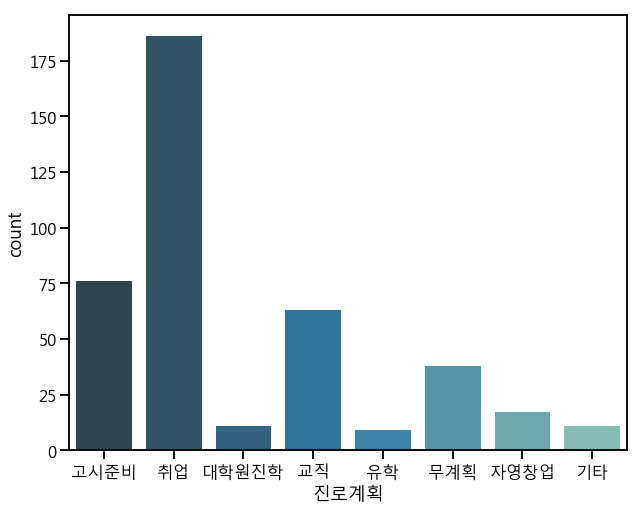

In [62]:
sns.countplot(x='진로계획', data=df, palette="YlGnBu_d")

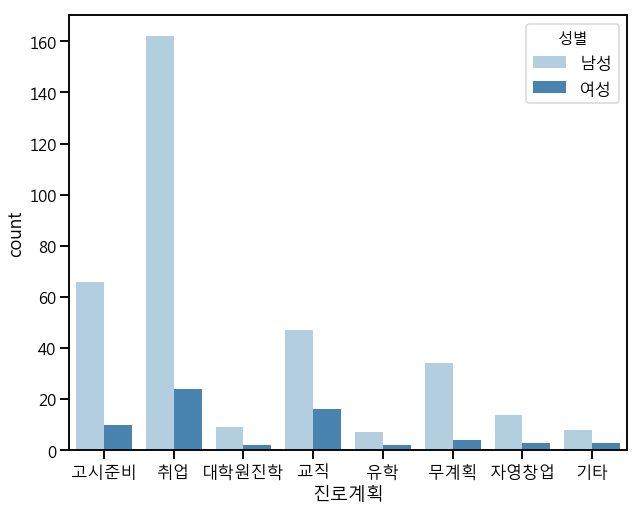

In [63]:
sns.countplot(x='진로계획', data=df, hue='성별', palette="Blues")

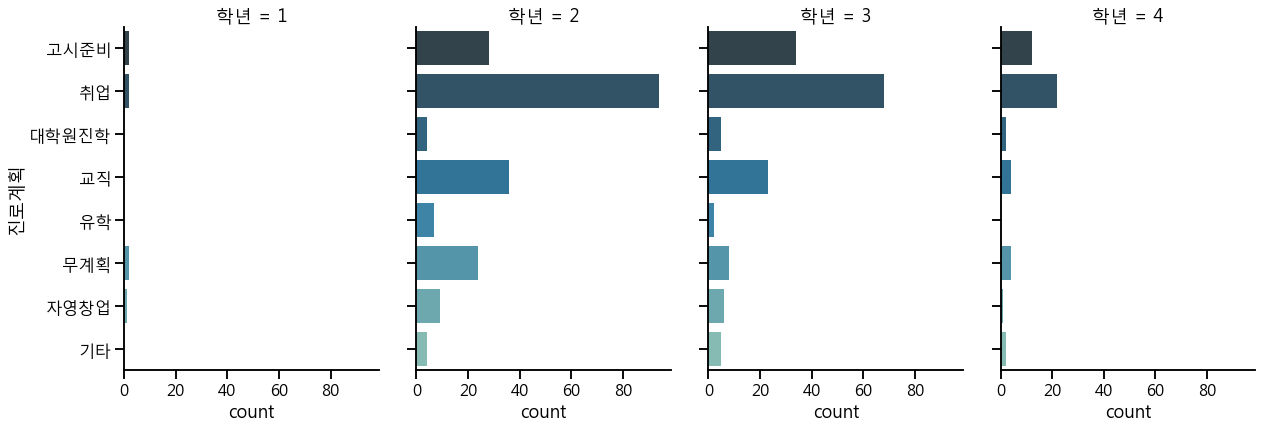

In [64]:
sns.catplot(y='진로계획', col='학년', kind='count',data=df, capsize=.2, palette="YlGnBu_d", height=6, aspect=.75,)

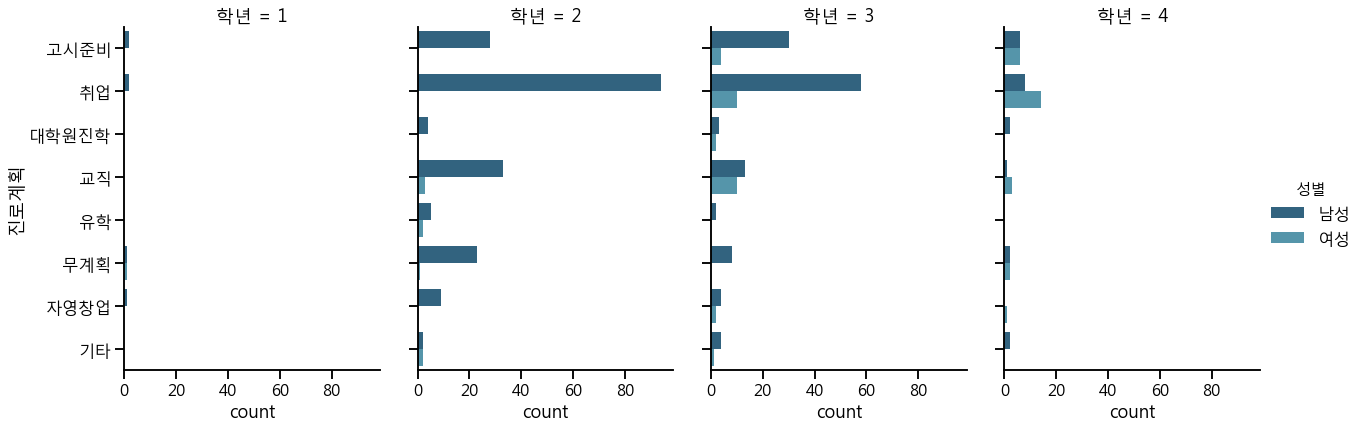

In [65]:
sns.catplot(y='진로계획', col='학년',hue='성별', kind='count',data=df, capsize=.2, palette="YlGnBu_d", height=6, aspect=.75,)

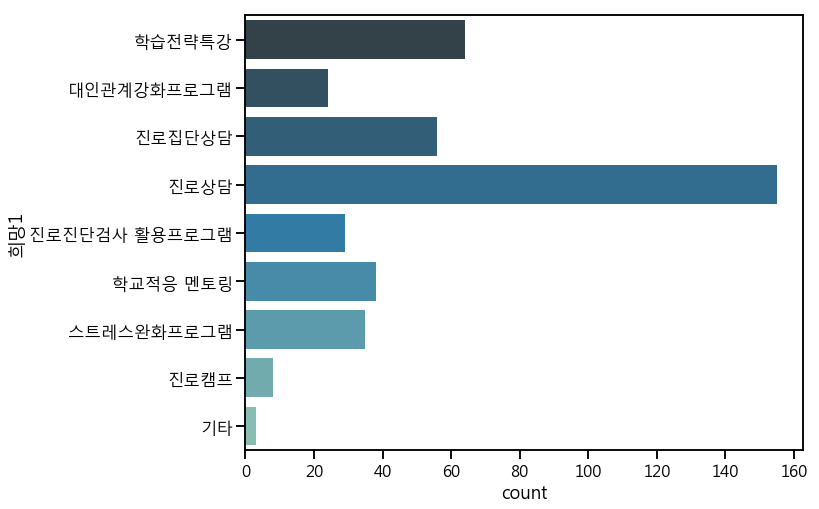

In [66]:
sns.countplot(y='희망1', data=df, palette="YlGnBu_d")

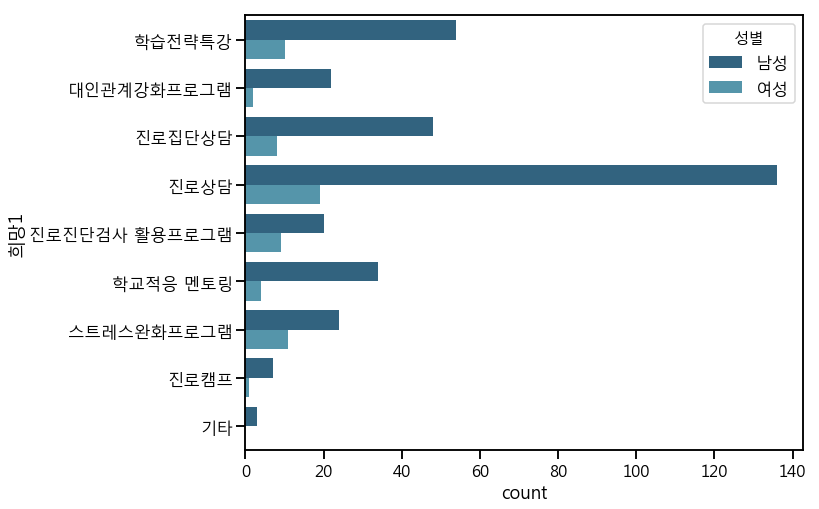

In [67]:
sns.countplot(y='희망1', hue='성별', data=df, palette="YlGnBu_d")

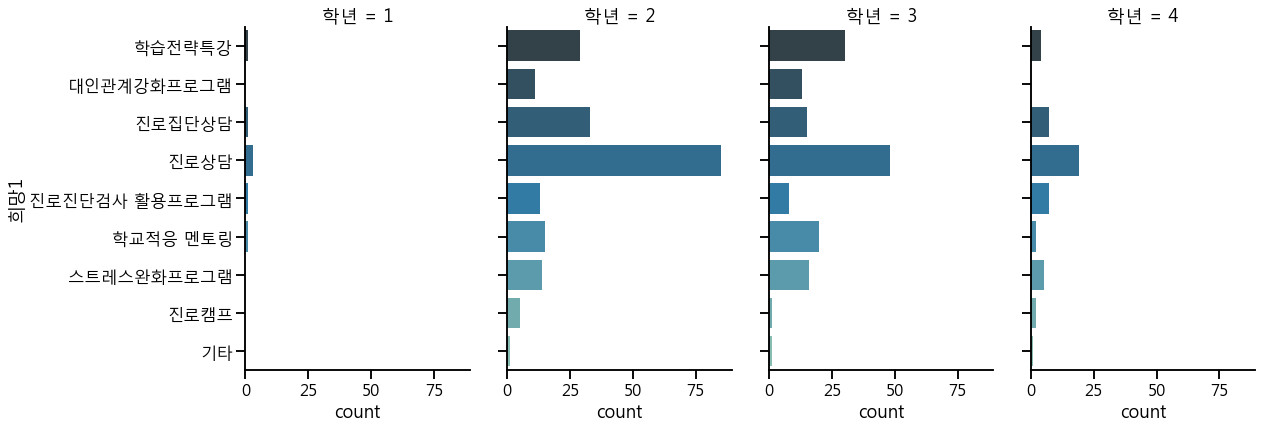

In [68]:
sns.catplot(y='희망1', col='학년', kind='count',data=df, capsize=.2, palette="YlGnBu_d", height=6, aspect=.75,)

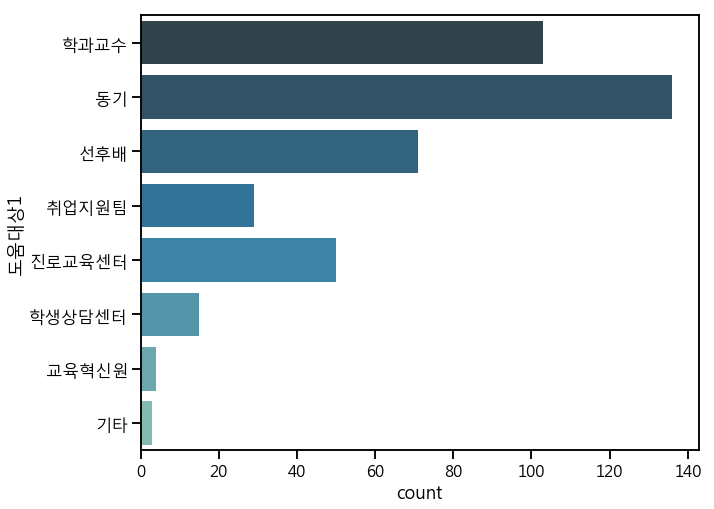

In [69]:
sns.countplot(y='도움대상1', data=df, palette="YlGnBu_d")

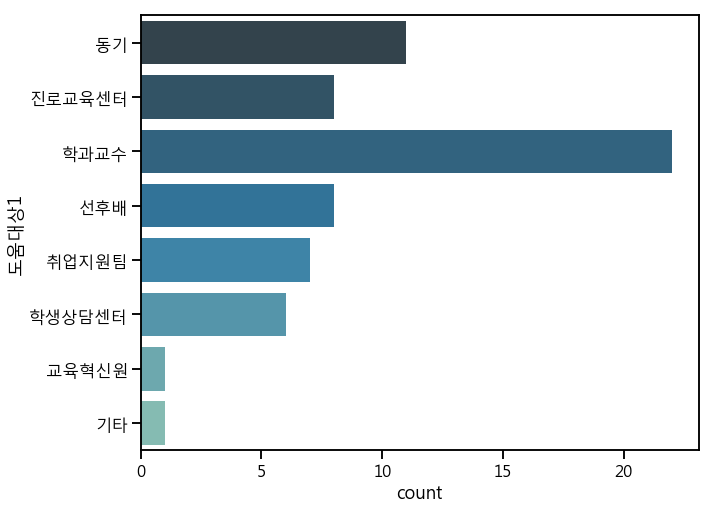

In [70]:
dff = df[df['성별']=='여성']
sns.countplot(y='도움대상1', data=dff, palette="YlGnBu_d")

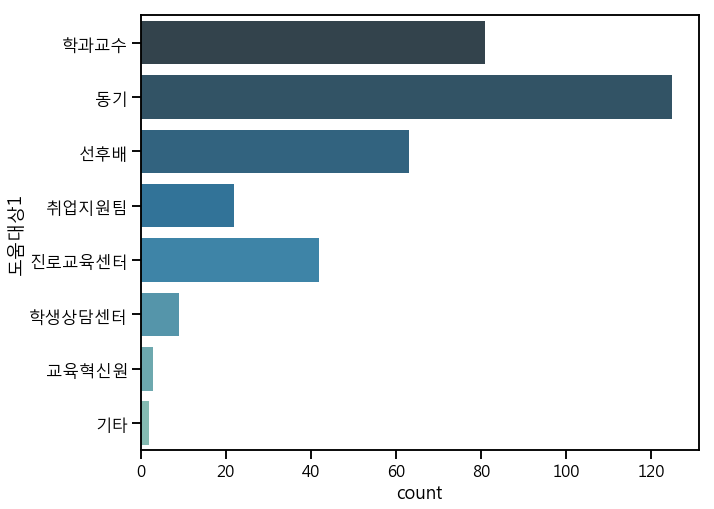

In [71]:
dff = df[df['성별']=='남성']
sns.countplot(y='도움대상1', data=dff, palette="YlGnBu_d")

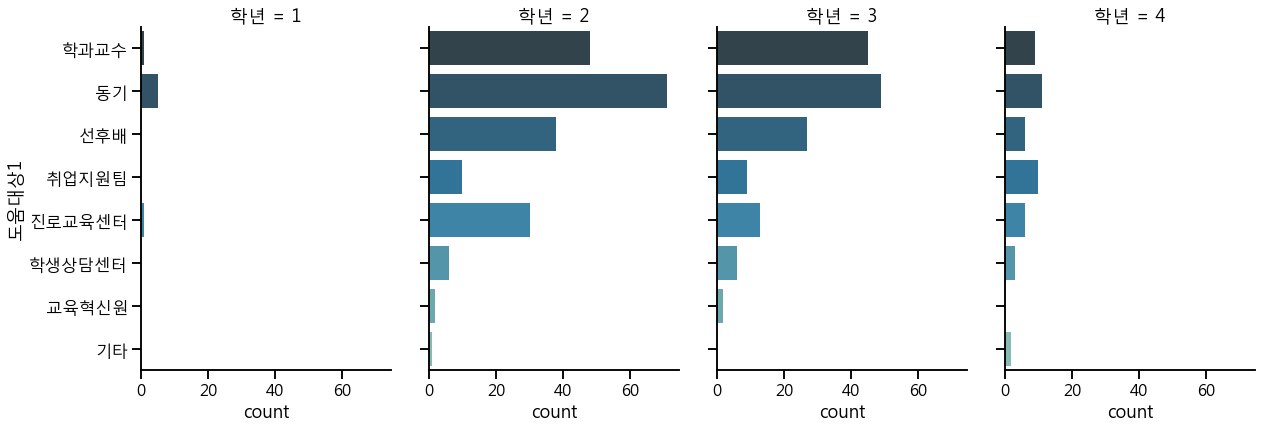

In [72]:
sns.catplot(y='도움대상1', col='학년', kind='count',data=df, capsize=.2, palette="YlGnBu_d", height=6, aspect=.75,)

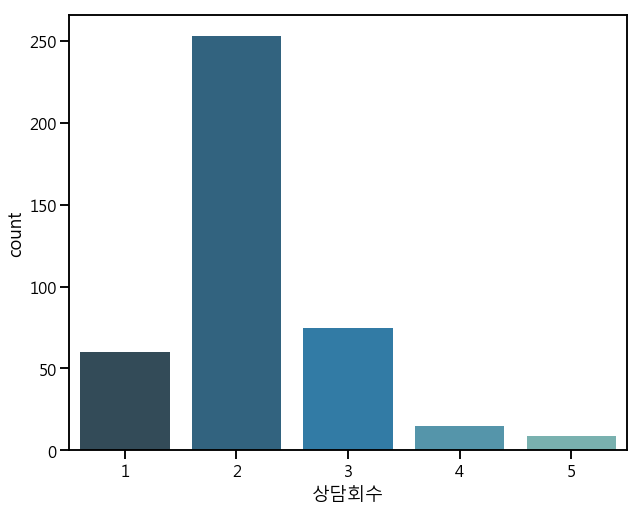

In [73]:
sns.countplot(x='상담회수', data=df, palette="YlGnBu_d")

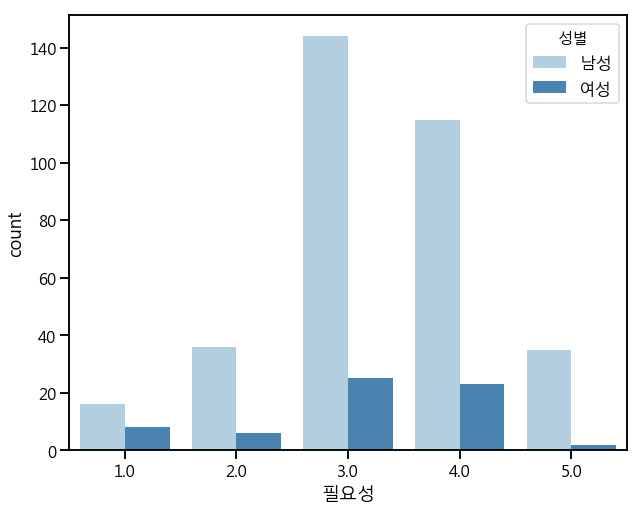

In [74]:
sns.countplot(x='필요성', hue='성별',data=df, palette='Blues')

In [75]:
df['참여의사'].mean()

2.943765281173594

In [76]:
df[df['성별']=="여성"]['필요성'].mean()

3.078125

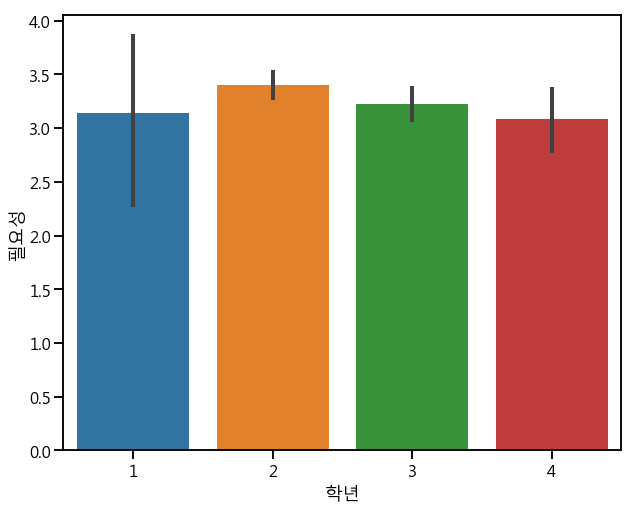

In [77]:
sns.barplot(x='학년', y='필요성', data=df)

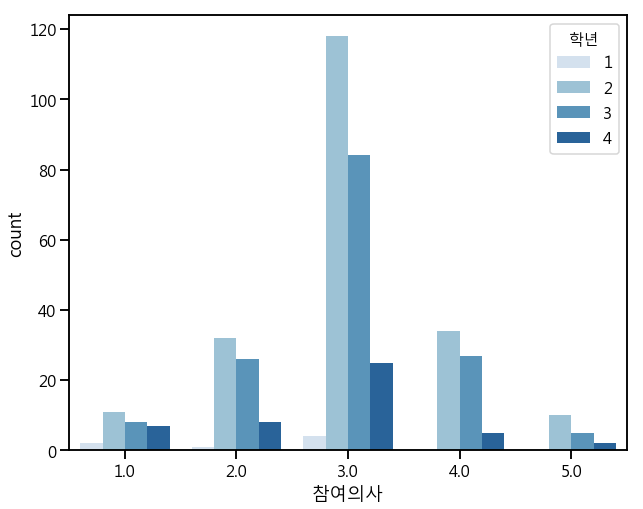

In [78]:
sns.countplot(x='참여의사', hue='학년',data=df, palette='Blues')

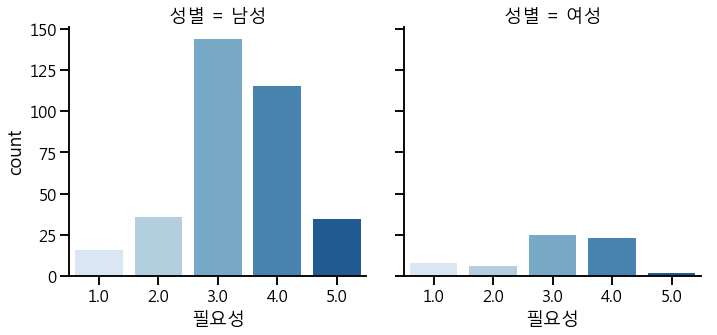

In [79]:
sns.catplot(x='필요성', col='성별',data=df, kind='count', palette='Blues')

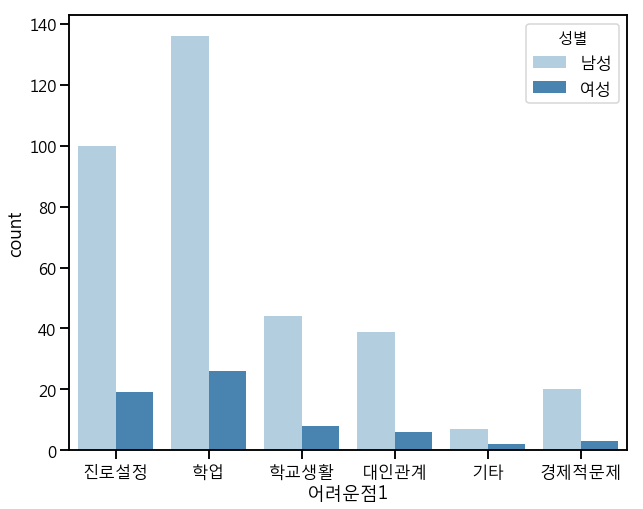

In [80]:
sns.countplot(x='어려운점1', hue='성별', data=df, palette='Blues')

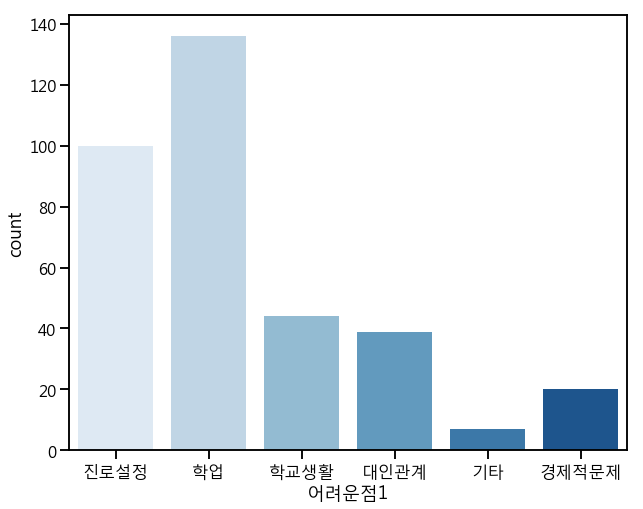

In [81]:
dff = df[df['성별']=='남성']
sns.countplot(x='어려운점1', data=dff, palette='Blues')

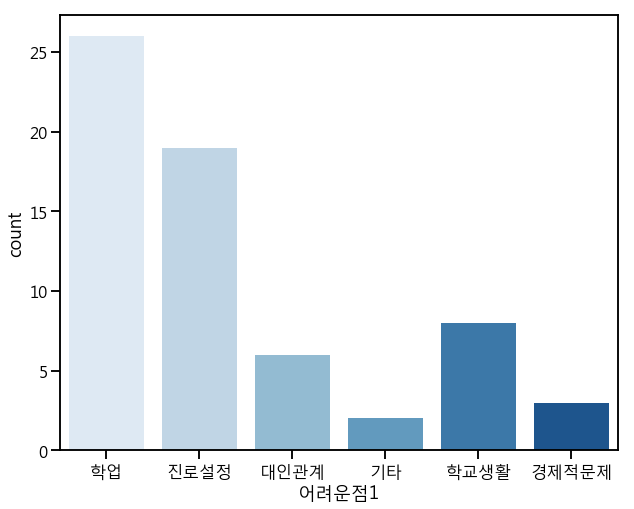

In [82]:
dff = df[df['성별']=='여성']
sns.countplot(x='어려운점1', data=dff, palette='Blues')

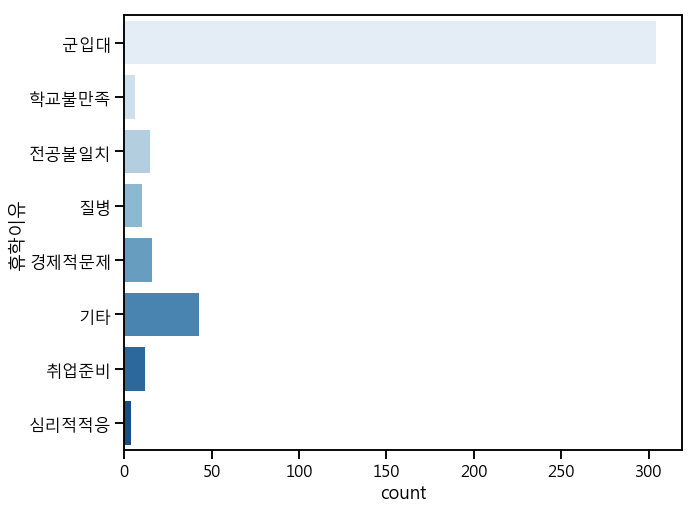

In [84]:
sns.countplot(y='휴학이유', data=df, palette='Blues')